<a href="https://colab.research.google.com/github/ankitojha2705/ankitojha2705-CRISP_DM_SEMMA_AND_KDD-Models/blob/main/Semma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import files
files.upload()  # This will prompt you to upload the kaggle.json file



Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ankitojha2705","key":"63cf9eae237f41daf097275c2f370579"}'}

In [7]:
import os
os.makedirs('/root/.kaggle', exist_ok=True)
!mv kaggle.json /root/.kaggle/
os.chmod('/root/.kaggle/kaggle.json', 600)


In [9]:
from google.colab import files
uploaded = files.upload()  # Upload your dataset file


Saving archive.zip to archive.zip


In [11]:
!unzip archive.zip


Archive:  archive.zip
  inflating: WA_Fn-UseC_-Telco-Customer-Churn.csv  


In [12]:
!ls


archive.zip  sample_data  WA_Fn-UseC_-Telco-Customer-Churn.csv


## Load the Dataset into a DataFrame

In [13]:
import pandas as pd

# Load the dataset
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Display the first few rows of the dataset
print("Dataset Loaded Successfully")
print(df.head())

# Check basic information about the dataset
print("\nDataset Info:")
print(df.info())


Dataset Loaded Successfully
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV Streamin

# Step 1. Sample
- We need to select a sample of the data if the dataset is too large or proceed with the full dataset if it's manageable.

In [14]:
from sklearn.model_selection import train_test_split

# Split the data into features and target
X = df.drop('Churn', axis=1)  # 'Churn' is our target variable
y = df['Churn']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Data Size:", X_train.shape)
print("Testing Data Size:", X_test.shape)


Training Data Size: (5634, 20)
Testing Data Size: (1409, 20)


# Step 2. Explore
- We perform Exploratory Data Analysis (EDA) to understand the distributions, identify patterns, and check for missing values.

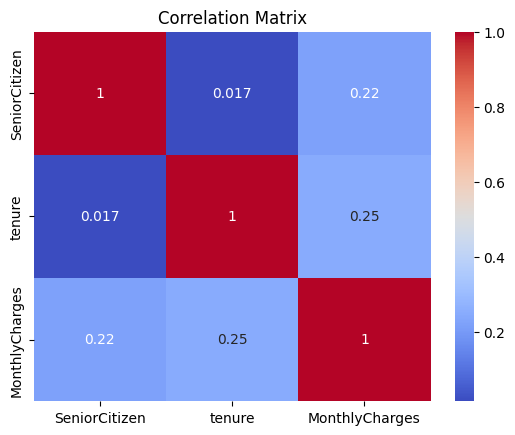

In [16]:
# Select only numeric columns for the correlation matrix
numeric_df = df.select_dtypes(include='number')

# Now, create the heatmap with the numeric columns
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


# step 3. Modify
- This step involves data cleaning, handling missing values, encoding categorical variables, and scaling the data if necessary.

In [19]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Identify all categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Encode all categorical columns
label_encoders = {}
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    X[column] = label_encoders[column].fit_transform(X[column])

# Now, split the encoded data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Step 4. Model
- We’ll train three popular models: Logistic Regression, Random Forest, and XGBoost. Here’s the code to train these models:

In [21]:
# Convert the target variable 'y' from 'Yes'/'No' to 1/0
y = y.map({'Yes': 1, 'No': 0})

# Now, split the encoded data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Proceed with model training
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

# Initialize the models
log_reg = LogisticRegression()
rf = RandomForestClassifier()
xgb = XGBClassifier()

# Train Logistic Regression
log_reg.fit(X_train, y_train)

# Train Random Forest
rf.fit(X_train, y_train)

# Train XGBoost
xgb.fit(X_train, y_train)

print("Models have been trained successfully!")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Models have been trained successfully!


# Step 5. Assess
- We evaluate each model using metrics like accuracy, precision, recall, and F1-score to understand their performance.

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Function to evaluate and print metrics
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    print(f"F1 Score: {f1_score(y_test, y_pred)}\n")

# Evaluate Logistic Regression
print("\nLogistic Regression Metrics:")
evaluate_model(log_reg, X_test, y_test)

# Evaluate Random Forest
print("Random Forest Metrics:")
evaluate_model(rf, X_test, y_test)

# Evaluate XGBoost
print("XGBoost Metrics:")
evaluate_model(xgb, X_test, y_test)



Logistic Regression Metrics:
Accuracy: 0.8026969481902059
Precision: 0.6479750778816199
Recall: 0.5576407506702413
F1 Score: 0.5994236311239193

Random Forest Metrics:
Accuracy: 0.8019872249822569
Precision: 0.6666666666666666
Recall: 0.5040214477211796
F1 Score: 0.5740458015267176

XGBoost Metrics:
Accuracy: 0.7892122072391767
Precision: 0.6180124223602484
Recall: 0.5335120643431636
F1 Score: 0.5726618705035971



In [23]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)



In [24]:
# Example: Creating a new feature based on existing features (this is just an illustrative example)
df['TotalChargesPerMonth'] = df['TotalCharges'] / (df['tenure'] + 1)  # Adding 1 to avoid division by zero


In [25]:
# Using correlation to drop less important features (example)
correlation_matrix = df.corr()
correlated_features = correlation_matrix['Churn'].abs().sort_values(ascending=False)

# Display top correlated features with 'Churn'
print("Top Correlated Features with 'Churn':\n", correlated_features)


Top Correlated Features with 'Churn':
 Churn                   1.000000
Contract                0.396713
tenure                  0.352229
TotalChargesPerMonth    0.325032
OnlineSecurity          0.289309
TechSupport             0.282492
OnlineBackup            0.195525
MonthlyCharges          0.193356
PaperlessBilling        0.191825
DeviceProtection        0.178134
Dependents              0.164221
SeniorCitizen           0.150889
Partner                 0.150448
PaymentMethod           0.107062
InternetService         0.047291
StreamingMovies         0.038492
MultipleLines           0.038037
StreamingTV             0.036581
customerID              0.017447
TotalCharges            0.014479
PhoneService            0.011942
gender                  0.008612
Name: Churn, dtype: float64


In [28]:
import pandas as pd

# Make sure 'TotalChargesPerMonth' is created in the original dataframe
df['TotalChargesPerMonth'] = df['TotalCharges'] / (df['tenure'] + 1)  # Avoid division by zero

# Recreate X and y to include the new feature
X = df.drop('Churn', axis=1)  # Drop target variable from features
y = df['Churn'].map({'Yes': 1, 'No': 0})  # Encode target variable

# Make sure X_train_resampled and X_test are DataFrames with proper columns
X_train_resampled = pd.DataFrame(X_train_resampled, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

# Select only the features with correlation above 0.15
selected_features = correlated_features[correlated_features > 0.15].index
selected_features = selected_features.drop('Churn')  # Drop 'Churn' from selected features

# Update the feature matrix with the selected features
X_train_resampled = X_train_resampled[selected_features]
X_test = X_test[selected_features]


In [30]:
from sklearn.impute import SimpleImputer

# Impute missing values in the training and testing data
imputer = SimpleImputer(strategy='median')  # Use 'median' for numerical data
X_train_resampled = imputer.fit_transform(X_train_resampled)
X_test = imputer.transform(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['TotalChargesPerMonth']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['TotalChargesPerMonth']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the models
log_reg = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Train the models
log_reg.fit(X_train_resampled, y_train_resampled)
rf.fit(X_train_resampled, y_train_resampled)
xgb.fit(X_train_resampled, y_train_resampled)

# Function to evaluate and print metrics
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    print(f"F1 Score: {f1_score(y_test, y_pred)}\n")

# Evaluate each model
print("\nLogistic Regression Metrics:")
evaluate_model(log_reg, X_test, y_test)

print("Random Forest Metrics:")
evaluate_model(rf, X_test, y_test)

print("XGBoost Metrics:")
evaluate_model(xgb, X_test, y_test)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:30:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Logistic Regression Metrics:
Accuracy: 0.7601135557132718
Precision: 0.5329566854990584
Recall: 0.7587131367292225
F1 Score: 0.6261061946902655

Random Forest Metrics:
Accuracy: 0.7735982966643009
Precision: 0.5692307692307692
Recall: 0.5951742627345844
F1 Score: 0.581913499344692

XGBoost Metrics:
Accuracy: 0.7679205110007097
Precision: 0.5513392857142857
Recall: 0.6621983914209115
F1 Score: 0.6017052375152253



In [32]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='f1', cv=5)
grid_search.fit(X_train_resampled, y_train_resampled)

# Best parameters and model
best_rf = grid_search.best_estimator_
print("Best Parameters for Random Forest:", grid_search.best_params_)


Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [33]:
# Train the Random Forest model with the best parameters
best_rf.fit(X_train_resampled, y_train_resampled)

# Evaluate the tuned Random Forest model
print("\nTuned Random Forest Metrics:")
evaluate_model(best_rf, X_test, y_test)



Tuned Random Forest Metrics:
Accuracy: 0.7785663591199432
Precision: 0.5685393258426966
Recall: 0.67828418230563
F1 Score: 0.6185819070904646

